<a href="https://colab.research.google.com/github/accarter/DS-Unit-1-Sprint-1-Data-Wrangling-and-Storytelling/blob/master/module4-make-explanatory-visualizations/LS_DS_114_Make_Explanatory_Visualizations_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science

*Unit 1, Sprint 1, Module 4*

---

# ASSIGNMENT

### 1) Replicate the lesson code. I recommend that you [do not copy-paste](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit).

Get caught up to where we got our example in class and then try and take things further. How close to "pixel perfect" can you make the lecture graph?

Once you have something that you're proud of, share your graph in the cohort channel and move on to the second exercise.

### 2) Reproduce another example from [FiveThityEight's shared data repository](https://data.fivethirtyeight.com/).

**WARNING**: There are a lot of very custom graphs and tables at the above link. I **highly** recommend not trying to reproduce any that look like a table of values or something really different from the graph types that we are already familiar with. Search through the posts until you find a graph type that you are more or less familiar with: histogram, bar chart, stacked bar chart, line chart, [seaborn relplot](https://seaborn.pydata.org/generated/seaborn.relplot.html), etc. Recreating some of the graphics that 538 uses would be a lot easier in Adobe photoshop/illustrator than with matplotlib. 

- If you put in some time to find a graph that looks "easy" to replicate you'll probably find that it's not as easy as you thought. 

- If you start with a graph that looks hard to replicate you'll probably run up against a brick wall and be disappointed with your afternoon.












In [0]:
# replicated lesson code can be found at: https://colab.research.google.com/drive/18leG73Wftj9LOUhKeDkJpGH3NZfUyeeu?usp=sharing

In [0]:
# Objective: reproduce the plot found in "The Rise And Fall of Women’s College Basketball Dynasties"
# The plot depicts a model that predicts the # of tournament wins based on seed

# to see the article visit: https://fivethirtyeight.com/features/louisiana-tech-was-the-uconn-of-the-80s/

In [0]:
!wget https://fivethirtyeight.com/wp-content/uploads/2019/03/Paine-womens-bball-programs.03tk-0305-1.png

--2020-05-15 14:29:26--  https://fivethirtyeight.com/wp-content/uploads/2019/03/Paine-womens-bball-programs.03tk-0305-1.png
Resolving fivethirtyeight.com (fivethirtyeight.com)... 192.0.66.2
Connecting to fivethirtyeight.com (fivethirtyeight.com)|192.0.66.2|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 45842 (45K) [image/png]
Saving to: ‘Paine-womens-bball-programs.03tk-0305-1.png.1’

Paine-womens-bball- 100%[===================>]  44.77K  --.-KB/s    in 0.02s   

2020-05-15 14:29:26 (2.39 MB/s) - ‘Paine-womens-bball-programs.03tk-0305-1.png.1’ saved [45842/45842]



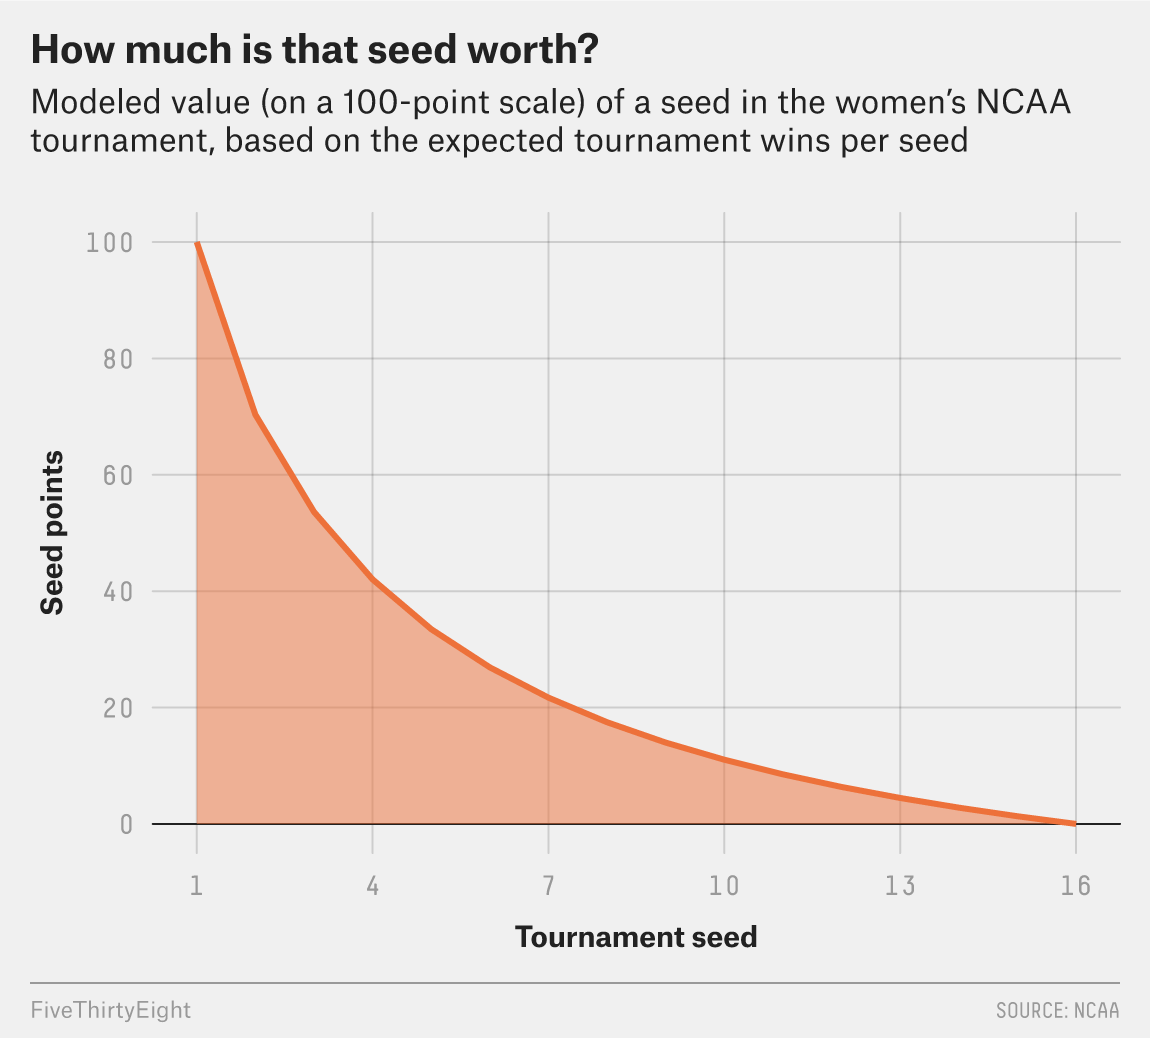

In [0]:
# take a look at the original plot from the article

from IPython.display import Image, display
display(Image('Paine-womens-bball-programs.03tk-0305-1.png', width=600))

In [0]:
import pandas as pd
import matplotlib.pyplot as plt

In [0]:
url = 'https://raw.githubusercontent.com/fivethirtyeight/data/master/ncaa-womens-basketball-tournament/ncaa-womens-basketball-tournament-history.csv'
basketball = pd.read_csv(url)
basketball.head()

,Year,School,Seed,Conference,Conf. W,Conf. L,Conf. %,Conf. place,Reg. W,Reg. L,Reg. %,How qual,1st game at home?,Tourney W,Tourney L,Tourney finish,Full W,Full L,Full %
0,1982,Arizona St.,4,Western Collegiate,-,-,-,-,23,6,79.3,at-large,Y,1,1,RSF,24,7,77.4
1,1982,Auburn,7,Southeastern,-,-,-,-,24,4,85.7,at-large,N,0,1,1st,24,5,82.8
2,1982,Cheyney,2,Independent,-,-,-,-,24,2,92.3,at-large,Y,4,1,N2nd,28,3,90.3
3,1982,Clemson,5,Atlantic Coast,6,3,66.7,4th,20,11,64.5,at-large,N,0,1,1st,20,12,62.5
4,1982,Drake,4,Missouri Valley,-,-,-,-,26,6,81.3,auto,Y,2,1,RF,28,7,80


In [0]:
# isolate relevant features/variables
seeds_to_twins = basketball[['Seed', 'Tourney W']].copy()
seeds_to_twins.head()

,Seed,Tourney W
0,4,1
1,7,0
2,2,4
3,5,0
4,4,2


In [0]:
# inspect datatypes for each column - seeds are (unexpectedly) strings, not ints
seeds_to_twins.dtypes

Seed         object
Tourney W     int64
dtype: object

In [0]:
# special note: teams who won open round (OR) in 1983 became the 8th seed in the region

# option 1: drop all rows with '(OR)' as the seed value
# seeds_to_twins = seeds_to_twins[seeds_to_twins['Seed'] != '(OR)']

In [0]:
# option 2: convert '(OR)' seed values to 8
# convert seed to ints

def seed_to_int(seed_str):
  if seed_str == '(OR)':
    return 8
  return int(seed_str)

seeds_to_twins['SeedInt'] = seeds_to_twins['Seed'].apply(seed_to_int)
seeds_to_twins.head()

,Seed,Tourney W,SeedInt
0,4,1,4
1,7,0,7
2,2,4,2
3,5,0,5
4,4,2,4


In [0]:
# determine the average # of wins for each seed
avg_wins_by_seed = seeds_to_twins.groupby('SeedInt').mean().sort_index()
avg_wins_by_seed

,Tourney W
SeedInt,
1,3.483221
2,2.482993
3,1.791946
4,1.567568
5,0.993289
6,0.850340
7,0.724832
8,0.516779
9,0.534351


In [0]:
# convert to 100-point scale
max_avg = avg_wins_by_seed['Tourney W'].max()
avg_wins_by_seed['WinPoints'] = avg_wins_by_seed['Tourney W'] / max_avg * 100
avg_wins_by_seed.head()

,Tourney W,WinPoints
SeedInt,,
1,3.483221,100.000000
2,2.482993,71.284390
3,1.791946,51.445087
4,1.567568,45.003385
5,0.993289,28.516378


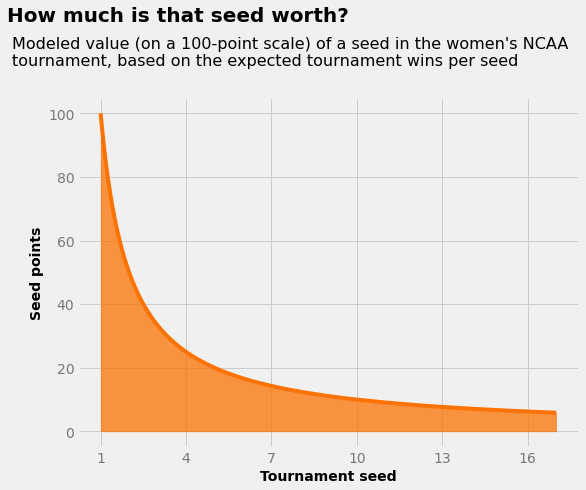

In [0]:
import numpy as np
import seaborn as sns

# set style, specify number of axes (rows and columns)
# and get reference to axis (not array since only 1 axis was created)
plt.style.use('fivethirtyeight')
fig, ax = plt.subplots(1,1,figsize=(8,6))

# generate dummy data
seeds = pd.Series(np.linspace(1,17,1000))  # 1000 values in interval: [0, 16)
points = 100 / seeds                       # broadcasting

# set color for plot, draw curve and shade in area between curve and axes
color = '#fc7303'
ax.plot(seeds, points, color=color);
plt.fill_between(seeds, points, color=color, alpha=0.75);

# Set the title and subtitle
ax.set_title('How much is that seed worth?',
             fontweight='600',
             fontsize=20,
             x=.2,
             y=1.20)
ax.text(s="Modeled value (on a 100-point scale) of a seed in the women's NCAA\ntournament, based on the expected tournament wins per seed",
        fontweight='200',
        fontsize=16,
        x=-2.1,
        y=115)

# set the x and y axes labels
ax.set_xlabel("Tournament seed", fontsize=14, fontweight='bold', linespacing=2)
ax.set_ylabel("Seed points", fontsize=14, fontweight='bold', linespacing=2)

# Fix the x an y axis tick marks and grid
ax.set_xticks(range(1,17,3))
ax.set_xticklabels(range(1,17,3), fontsize=14, alpha=0.5)
ax.set_yticks(range(0,101,20))
ax.set_yticklabels(range(0,101,20), fontsize=14, alpha=0.5);

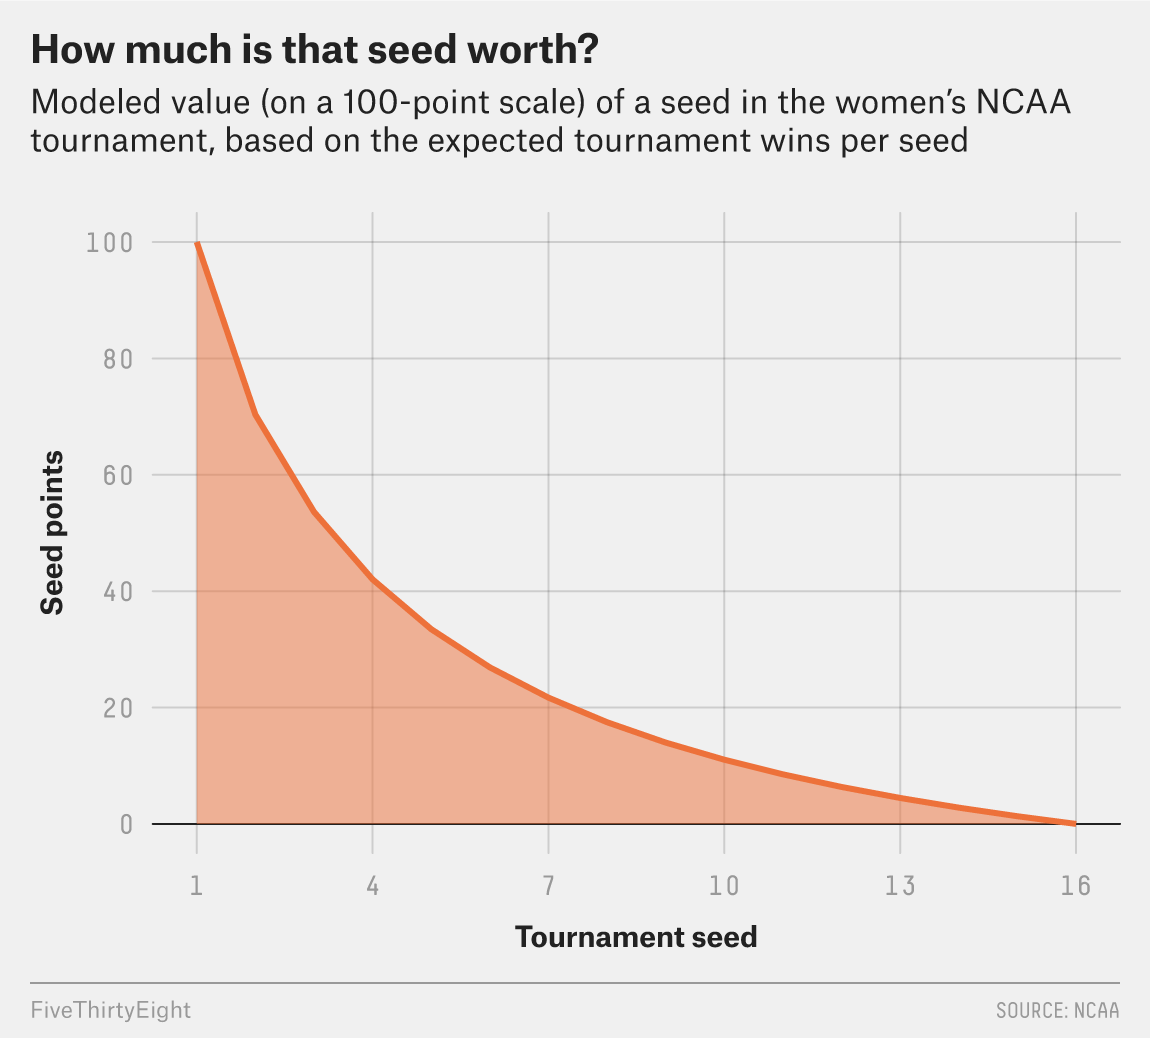

In [0]:
# take another look at the original plot

from IPython.display import Image, display
display(Image('Paine-womens-bball-programs.03tk-0305-1.png', width=600))

# STRETCH OPTIONS

### 1) Reproduce one of the following using the matplotlib or seaborn libraries:

- [thanksgiving-2015](https://fivethirtyeight.com/features/heres-what-your-part-of-america-eats-on-thanksgiving/) 
- [candy-power-ranking](https://fivethirtyeight.com/features/the-ultimate-halloween-candy-power-ranking/) 
- or another example of your choice!

### 2) Make more charts!

Choose a chart you want to make, from [Visual Vocabulary - Vega Edition](http://ft.com/vocabulary).

Find the chart in an example gallery of a Python data visualization library:
- [Seaborn](http://seaborn.pydata.org/examples/index.html)
- [Altair](https://altair-viz.github.io/gallery/index.html)
- [Matplotlib](https://matplotlib.org/gallery.html)
- [Pandas](https://pandas.pydata.org/pandas-docs/stable/visualization.html)

Reproduce the chart. [Optionally, try the "Ben Franklin Method."](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit) If you want, experiment and make changes.

Take notes. Consider sharing your work with your cohort!

In [0]:
# thanksgiving map
url = 'https://raw.githubusercontent.com/fivethirtyeight/data/master/thanksgiving-2015/thanksgiving-2015-poll-data.csv'

thanksgiving = pd.read_csv(url)
tg_columns = thanksgiving.columns
tg_columns

Index(['RespondentID', 'Do you celebrate Thanksgiving?',
       'What is typically the main dish at your Thanksgiving dinner?',
       'What is typically the main dish at your Thanksgiving dinner? - Other (please specify)',
       'How is the main dish typically cooked?',
       'How is the main dish typically cooked? - Other (please specify)',
       'What kind of stuffing/dressing do you typically have?',
       'What kind of stuffing/dressing do you typically have? - Other (please specify)',
       'What type of cranberry saucedo you typically have?',
       'What type of cranberry saucedo you typically have? - Other (please specify)',
       'Do you typically have gravy?',
       'Which of these side dishes aretypically served at your Thanksgiving dinner? Please select all that apply. - Brussel sprouts',
       'Which of these side dishes aretypically served at your Thanksgiving dinner? Please select all that apply. - Carrots',
       'Which of these side dishes aretypically served

In [0]:
# find relevant header names
region_str = tg_columns[-1]
print(region_str)
side_dishes = tg_columns[11:24]
print(side_dishes)

US Region
Index(['Which of these side dishes aretypically served at your Thanksgiving dinner? Please select all that apply. - Brussel sprouts',
       'Which of these side dishes aretypically served at your Thanksgiving dinner? Please select all that apply. - Carrots',
       'Which of these side dishes aretypically served at your Thanksgiving dinner? Please select all that apply. - Cauliflower',
       'Which of these side dishes aretypically served at your Thanksgiving dinner? Please select all that apply. - Corn',
       'Which of these side dishes aretypically served at your Thanksgiving dinner? Please select all that apply. - Cornbread',
       'Which of these side dishes aretypically served at your Thanksgiving dinner? Please select all that apply. - Fruit salad',
       'Which of these side dishes aretypically served at your Thanksgiving dinner? Please select all that apply. - Green beans/green bean casserole',
       'Which of these side dishes aretypically served at your Thank

In [0]:
meal_by_region = thanksgiving[[region_str, *side_dishes]]
meal_by_region.head()

,US Region,Which of these side dishes aretypically served at your Thanksgiving dinner? Please select all that apply. - Brussel sprouts,Which of these side dishes aretypically served at your Thanksgiving dinner? Please select all that apply. - Carrots,Which of these side dishes aretypically served at your Thanksgiving dinner? Please select all that apply. - Cauliflower,Which of these side dishes aretypically served at your Thanksgiving dinner? Please select all that apply. - Corn,Which of these side dishes aretypically served at your Thanksgiving dinner? Please select all that apply. - Cornbread,Which of these side dishes aretypically served at your Thanksgiving dinner? Please select all that apply. - Fruit salad,Which of these side dishes aretypically served at your Thanksgiving dinner? Please select all that apply. - Green beans/green bean casserole,Which of these side dishes aretypically served at your Thanksgiving dinner? Please select all that apply. - Macaroni and cheese,Which of these side dishes aretypically served at your Thanksgiving dinner? Please select all that apply. - Mashed potatoes,Which of these side dishes aretypically served at your Thanksgiving dinner? Please select all that apply. - Rolls/biscuits,Which of these side dishes aretypically served at your Thanksgiving dinner? Please select all that apply. - Squash,Which of these side dishes aretypically served at your Thanksgiving dinner? Please select all that apply. - Vegetable salad,Which of these side dishes aretypically served at your Thanksgiving dinner? Please select all that apply. - Yams/sweet potato casserole
0,Middle Atlantic,NaN,Carrots,NaN,NaN,NaN,NaN,Green beans/green bean casserole,Macaroni and cheese,Mashed potatoes,NaN,NaN,NaN,Yams/sweet potato casserole
1,East South Central,NaN,NaN,NaN,Corn,NaN,NaN,Green beans/green bean casserole,Macaroni and cheese,Mashed potatoes,Rolls/biscuits,NaN,Vegetable salad,Yams/sweet potato casserole
2,Mountain,Brussel sprouts,Carrots,Cauliflower,Corn,Cornbread,NaN,NaN,NaN,Mashed potatoes,Rolls/biscuits,NaN,Vegetable salad,NaN
3,Pacific,Brussel sprouts,NaN,NaN,NaN,Cornbread,NaN,NaN,NaN,Mashed potatoes,Rolls/biscuits,NaN,Vegetable salad,Yams/sweet potato casserole
4,Pacific,Brussel sprouts,NaN,NaN,NaN,Cornbread,NaN,NaN,NaN,Mashed potatoes,Rolls/biscuits,Squash,Vegetable salad,Yams/sweet potato casserole


In [0]:
regions = list(meal_by_region[region_str].unique())[:-1]
regions

['Middle Atlantic',
 'East South Central',
 'Mountain',
 'Pacific',
 'East North Central',
 'West North Central',
 'West South Central',
 'South Atlantic',
 'New England']

In [0]:
def clean_side_header(header):
  words = header.split()
  return " ".join(words[words.index('-') + 1:])

meal_by_region.columns[1:]

meals = []
for meal in meal_by_region.columns[1:]:
  meals.append(clean_side_header(meal))

meals

['Brussel sprouts',
 'Carrots',
 'Cauliflower',
 'Corn',
 'Cornbread',
 'Fruit salad',
 'Green beans/green bean casserole',
 'Macaroni and cheese',
 'Mashed potatoes',
 'Rolls/biscuits',
 'Squash',
 'Vegetable salad',
 'Yams/sweet potato casserole']

In [0]:
meal_dict = {region: {meal: 0 for meal in meals} for region in regions}

for region in regions:
  region_df = meal_by_region[meal_by_region[region_str] == region]
  rows = region_df.shape[0]
  for meal, dish in zip(meals, side_dishes):
    meal_dict[region][meal] = rows - region_df[dish].isnull().sum()

meal_dict

{'East North Central': {'Brussel sprouts': 22,
  'Carrots': 28,
  'Cauliflower': 13,
  'Corn': 76,
  'Cornbread': 23,
  'Fruit salad': 20,
  'Green beans/green bean casserole': 103,
  'Macaroni and cheese': 21,
  'Mashed potatoes': 127,
  'Rolls/biscuits': 123,
  'Squash': 15,
  'Vegetable salad': 26,
  'Yams/sweet potato casserole': 90},
 'East South Central': {'Brussel sprouts': 7,
  'Carrots': 15,
  'Cauliflower': 5,
  'Corn': 31,
  'Cornbread': 16,
  'Fruit salad': 20,
  'Green beans/green bean casserole': 49,
  'Macaroni and cheese': 21,
  'Mashed potatoes': 45,
  'Rolls/biscuits': 49,
  'Squash': 12,
  'Vegetable salad': 8,
  'Yams/sweet potato casserole': 44},
 'Middle Atlantic': {'Brussel sprouts': 41,
  'Carrots': 45,
  'Cauliflower': 25,
  'Corn': 77,
  'Cornbread': 33,
  'Fruit salad': 26,
  'Green beans/green bean casserole': 92,
  'Macaroni and cheese': 20,
  'Mashed potatoes': 130,
  'Rolls/biscuits': 106,
  'Squash': 44,
  'Vegetable salad': 33,
  'Yams/sweet potato cass

In [0]:
final = []

for region in meal_dict:
  region_dict = meal_dict[region]
  maxval = max(region_dict.values())
  for meal in region_dict:
    if region_dict[meal] == maxval:
      final.append((region, meal))
      break

final

[('Middle Atlantic', 'Mashed potatoes'),
 ('East South Central', 'Green beans/green bean casserole'),
 ('Mountain', 'Mashed potatoes'),
 ('Pacific', 'Mashed potatoes'),
 ('East North Central', 'Mashed potatoes'),
 ('West North Central', 'Mashed potatoes'),
 ('West South Central', 'Rolls/biscuits'),
 ('South Atlantic', 'Rolls/biscuits'),
 ('New England', 'Mashed potatoes')]

In [0]:
import plotly.express as px

state_abbreviations = {
    'Middle Atlantic': ['NY', 'NJ', 'PA'],
    'East South Central': ['AL', 'KY', 'MS', 'TN'],
    'Mountain': ['AZ', 'CO', 'ID', 'MT', 'NV', 'NM', 'UT', 'WY'],
    'Pacific': ['AK', 'CA', 'HI', 'OR', 'WA'],
    'East North Central': ['IL', 'IN', 'MI', 'OH', 'WI'],
    'West North Central': ['IA', 'KS', 'MN', 'MO', 'NE', 'ND', 'SD'],
    'West South Central': ['AR', 'LA', 'OK', 'TX'],
    'South Atlantic': ['DE', 'MD', 'VA', 'WV', 'NC', 'SC', 'GA', 'FL'],
    'New England': ['ME', 'VT', 'NH', 'MA', 'RI', 'CT']
}

sides = list({side for region, side in final})
states = []
colors = []
for region, side in final:
  abbreviations = state_abbreviations[region]
  states += abbreviations
  colors += [sides.index(side)] * len(abbreviations)

fig = px.choropleth(locations=states, locationmode="USA-states", color=colors, scope="usa")
fig.show()